In [1]:
import os
os.getcwd()

'/Users/sajin/ML/Exp'

In [93]:
path = '/Users/sajin/ML/datasets/nimhans/'
os.listdir(path)

['Output_1801_3600.csv', 'Output_pain.csv']

In [94]:
import pandas as pd
df = pd.read_csv(path+'Output_pain.csv')
df = pd.concat([df,pd.read_csv(path+'Output_1801_3600.csv')])
df.reset_index(inplace=True,drop=True)
df.shape

(5400, 18)

In [95]:
df.head()

,,Age,Weight(in Kgs),Gender,Heart rate,pulse rate,Systolic BP,Diastolic BP,BIS Value,Sleep Quality,SPO2,Pain Position,Medication,Dosage(mg),Label,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,p1,49,75.3,Male,85.7,84,141,92,80,0,90,Lower Back,Ibuprofen,150,L3,NaN,NaN,NaN
1,p2,46,61.2,Female,80.2,75,122,81,52,1,94,Shoulder,Tylenol,100,L2,NaN,L1,0.0
2,p3,19,51.0,Female,83.1,79,128,85,64,1,92,Abdomine,oxycodone,120,L2,NaN,L2,40.0
3,p4,44,84.0,Male,85,81,130,90,74,0,91,Muscle,Morphine,100,L3,NaN,L3,70.0
4,p5,41,65.0,Female,81.1,75,124,86,66,0,95,Neck,Hydromorphone,90,L2,NaN,NaN,NaN


In [96]:
for col in df.columns.to_list()[1:-3]:
    new = col.rstrip().lstrip()
    new = new.replace(' ','_').replace('(','_').replace(')','')
    print(col, new)
    df.rename(columns={col: new}, inplace=True)

Age Age
Weight(in Kgs) Weight_in_Kgs
Gender Gender
Heart rate Heart_rate
pulse rate pulse_rate
Systolic BP Systolic_BP
Diastolic BP Diastolic_BP
BIS Value BIS_Value
Sleep Quality Sleep_Quality
SPO2 SPO2
Pain Position Pain_Position
Medication Medication
Dosage(mg) Dosage_mg
Label Label


In [97]:
def get_data():
    data = df.iloc[:,1:-3]
    return data.copy()
data = get_data()
data.head()

,Age,Weight_in_Kgs,Gender,Heart_rate,pulse_rate,Systolic_BP,Diastolic_BP,BIS_Value,Sleep_Quality,SPO2,Pain_Position,Medication,Dosage_mg,Label
0,49,75.3,Male,85.7,84,141,92,80,0,90,Lower Back,Ibuprofen,150,L3
1,46,61.2,Female,80.2,75,122,81,52,1,94,Shoulder,Tylenol,100,L2
2,19,51.0,Female,83.1,79,128,85,64,1,92,Abdomine,oxycodone,120,L2
3,44,84.0,Male,85,81,130,90,74,0,91,Muscle,Morphine,100,L3
4,41,65.0,Female,81.1,75,124,86,66,0,95,Neck,Hydromorphone,90,L2


In [98]:
data.dtypes

Age                int64
Weight_in_Kgs    float64
Gender            object
Heart_rate        object
pulse_rate         int64
Systolic_BP        int64
Diastolic_BP       int64
BIS_Value          int64
Sleep_Quality      int64
SPO2               int64
Pain_Position     object
Medication        object
Dosage_mg         object
Label             object
dtype: object

In [99]:
#Seggregating numerical and categorical variables using data type.

numerical = []
categorical = []

for col in (data.columns):
    if data[col].dtype == "object":
        categorical.append(col)
    else:
        numerical.append(col)
print("numerical columns = ",numerical)
print("\ncategorical columns = ",categorical)

numerical columns =  ['Age', 'Weight_in_Kgs', 'pulse_rate', 'Systolic_BP', 'Diastolic_BP', 'BIS_Value', 'Sleep_Quality', 'SPO2']

categorical columns =  ['Gender', 'Heart_rate', 'Pain_Position', 'Medication', 'Dosage_mg', 'Label']


In [100]:
data[data.Heart_rate==' ']

,Age,Weight_in_Kgs,Gender,Heart_rate,pulse_rate,Systolic_BP,Diastolic_BP,BIS_Value,Sleep_Quality,SPO2,Pain_Position,Medication,Dosage_mg,Label
600,13,50.0,Male,,96,139,91,73,1,90,Knee Joint,Aspirin,150,L3
2400,17,49.0,Male,,93,137,91,76,1,93,Knee Joint,Aspirin,150,L3


In [101]:
data.loc[600,'Heart_rate'] = 81
data.loc[2400,'Heart_rate'] = 83

In [102]:
# data.Heart_rate.replace(' ',93,inplace=True)

In [103]:
data[data.Heart_rate==' ']

,Age,Weight_in_Kgs,Gender,Heart_rate,pulse_rate,Systolic_BP,Diastolic_BP,BIS_Value,Sleep_Quality,SPO2,Pain_Position,Medication,Dosage_mg,Label


In [104]:
import numpy as np
data['Heart_rate'] = data.Heart_rate.astype(np.float64)
data['Dosage_mg'] = data.Dosage_mg.replace('-',0)
data['Dosage_mg'] = data.Dosage_mg.astype(int)

NaN    2700
L2     1387
L3      866
L1      447
Name: Label, dtype: int64


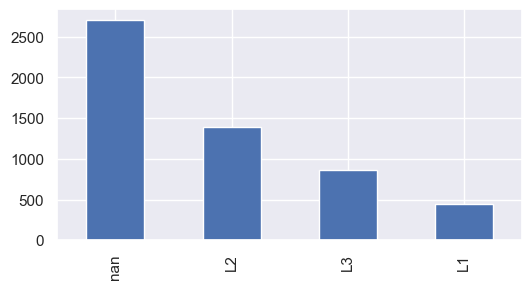

In [105]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
data.Label.value_counts(dropna=False).plot(kind='bar')
print(data.Label.value_counts(dropna=False))

<AxesSubplot: xlabel='Medication', ylabel='count'>

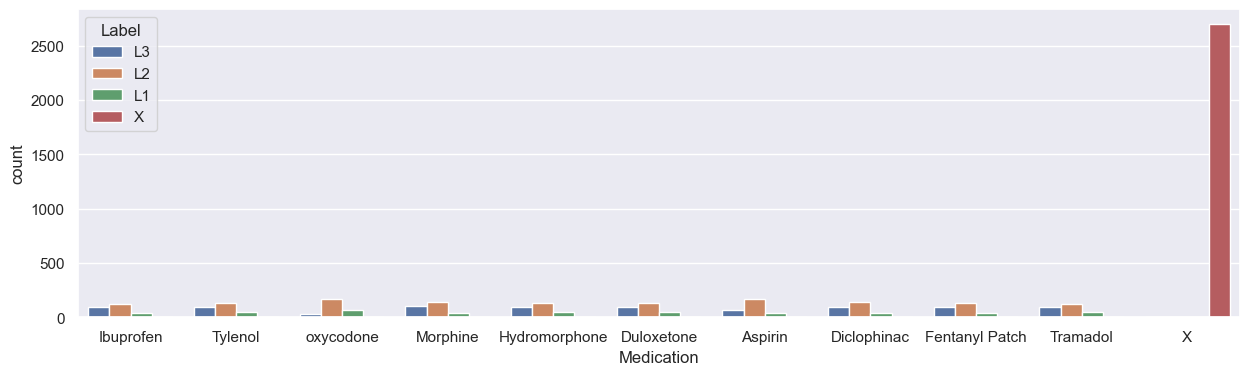

In [106]:
import seaborn as sns
plt.figure(figsize=(15,4))
temp = data.copy()
temp['Medication'] = temp.Medication.replace('-',np.nan).fillna('X')
temp['Label'] = temp.Label.fillna('X')
sns.countplot(x='Medication',hue='Label',data=temp)

### Data Looks highly unbalanced
#### Values in Medication and null values in Label need to be coded

In [107]:
data.Label.value_counts(dropna=False)
data.Label.fillna('L0',inplace=True)
data['Medication'] = data.Medication.replace('-','X')

In [108]:
print(data.Medication.value_counts(dropna=False))

X                 2700
Duloxetone         274
Aspirin            274
Tylenol            272
oxycodone          272
Morphine           272
Diclophinac        272
Fentanyl Patch     272
Hydromorphone      270
Tramadol           270
Ibuprofen          252
Name: Medication, dtype: int64


In [109]:
N = data.Medication.value_counts(dropna=False)
N = int(np.median(N))
N

272

In [110]:
print(data.shape)
tempMedData = data.query("Medication=='X'").sample(n=N)
indexAllMed = data.query("Medication=='X'").index
# Drop All X Medication
data.drop(indexAllMed, inplace=True)
data.reset_index(drop=True, inplace=True)
data.shape, tempMedData.shape

(5400, 14)


((2700, 14), (272, 14))

In [111]:
data = pd.concat([data, tempMedData])
data.reset_index(drop= True, inplace = True)
data.shape

(2972, 14)

In [112]:
data.head()

,Age,Weight_in_Kgs,Gender,Heart_rate,pulse_rate,Systolic_BP,Diastolic_BP,BIS_Value,Sleep_Quality,SPO2,Pain_Position,Medication,Dosage_mg,Label
0,49,75.3,Male,85.7,84,141,92,80,0,90,Lower Back,Ibuprofen,150,L3
1,46,61.2,Female,80.2,75,122,81,52,1,94,Shoulder,Tylenol,100,L2
2,19,51.0,Female,83.1,79,128,85,64,1,92,Abdomine,oxycodone,120,L2
3,44,84.0,Male,85.0,81,130,90,74,0,91,Muscle,Morphine,100,L3
4,41,65.0,Female,81.1,75,124,86,66,0,95,Neck,Hydromorphone,90,L2


In [113]:
data.Medication.value_counts(dropna=False)

Duloxetone        274
Aspirin           274
Tylenol           272
oxycodone         272
Morphine          272
Diclophinac       272
Fentanyl Patch    272
X                 272
Hydromorphone     270
Tramadol          270
Ibuprofen         252
Name: Medication, dtype: int64

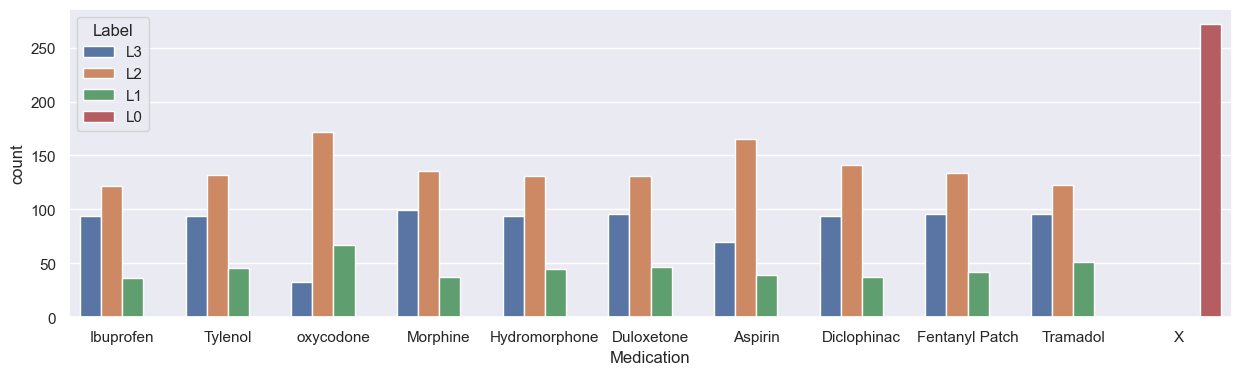

In [114]:
plt.figure(figsize=(15,4))
temp = data.copy()
sns.countplot(x='Medication',hue='Label',data=temp)
del temp

In [115]:
#Seggregating numerical and categorical variables using data type.

numerical = []
categorical = []

for col in (data.columns):
    if data[col].dtype == "object":
        categorical.append(col)
    else:
        numerical.append(col)
print("numerical columns = ",numerical)
print("\ncategorical columns = ",categorical)

numerical columns =  ['Age', 'Weight_in_Kgs', 'Heart_rate', 'pulse_rate', 'Systolic_BP', 'Diastolic_BP', 'BIS_Value', 'Sleep_Quality', 'SPO2', 'Dosage_mg']

categorical columns =  ['Gender', 'Pain_Position', 'Medication', 'Label']


array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Weight_in_Kgs'}>,
        <AxesSubplot: title={'center': 'Heart_rate'}>],
       [<AxesSubplot: title={'center': 'pulse_rate'}>,
        <AxesSubplot: title={'center': 'Systolic_BP'}>,
        <AxesSubplot: title={'center': 'Diastolic_BP'}>],
       [<AxesSubplot: title={'center': 'BIS_Value'}>,
        <AxesSubplot: title={'center': 'Sleep_Quality'}>,
        <AxesSubplot: title={'center': 'SPO2'}>],
       [<AxesSubplot: title={'center': 'Dosage_mg'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

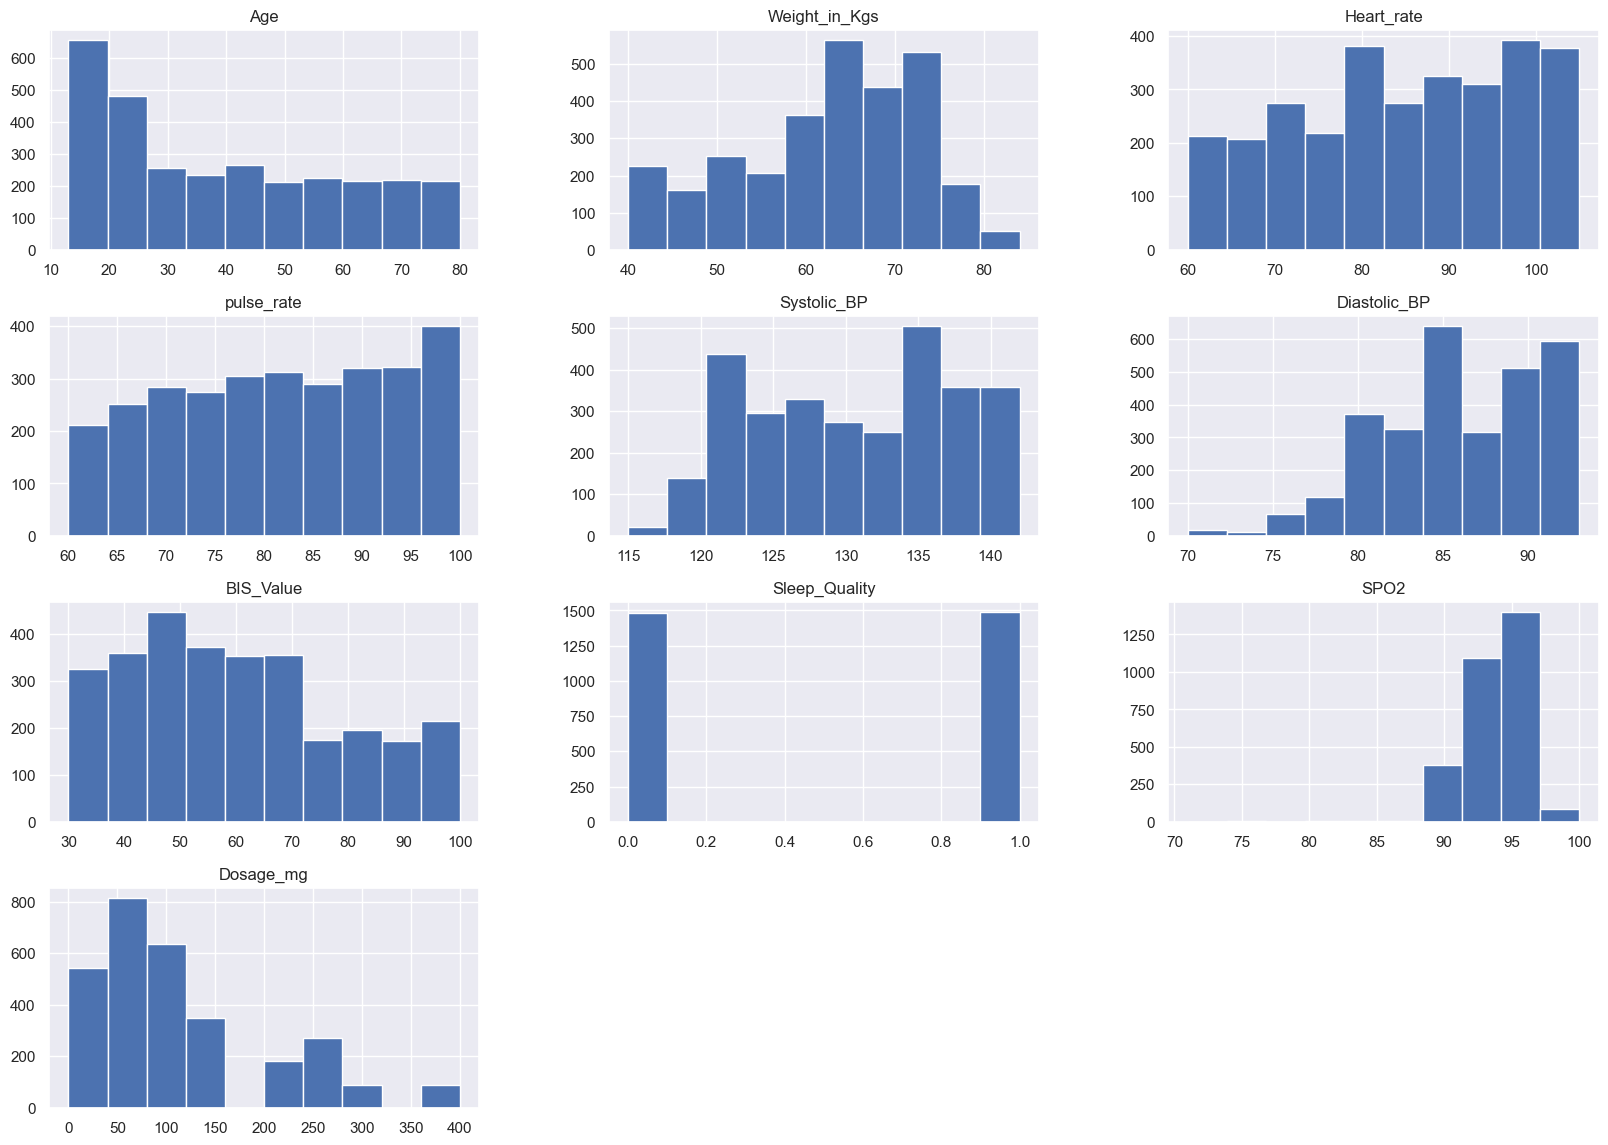

In [116]:
data[numerical].hist(figsize=(20,14))

<AxesSubplot: >

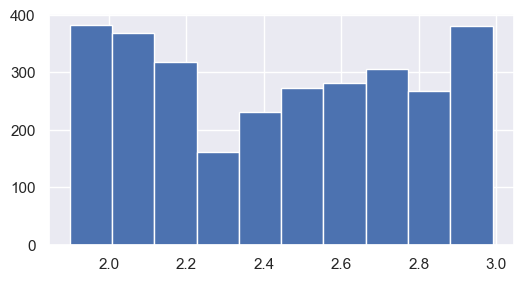

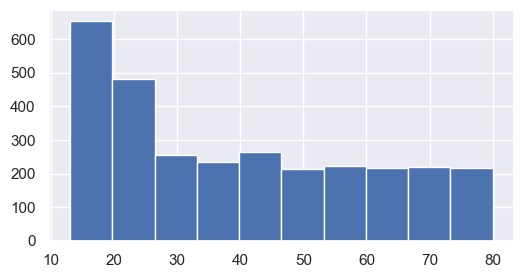

In [117]:
plt.figure(figsize=(6,3) )
np.power(data.Age,0.25).hist()

plt.figure(figsize=(6,3) )
data.Age.hist()

<AxesSubplot: >

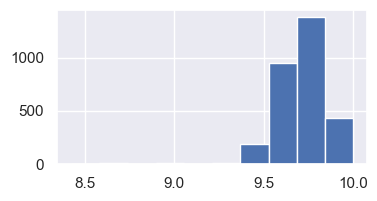

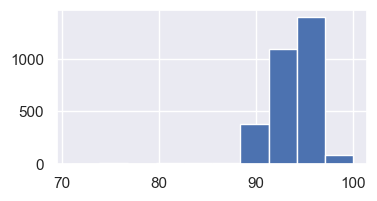

In [118]:
plt.figure(figsize=(4,2) )
np.power(data.SPO2,0.5).hist()

plt.figure(figsize=(4,2) )
data.SPO2.hist()

<AxesSubplot: >

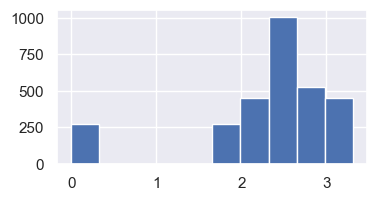

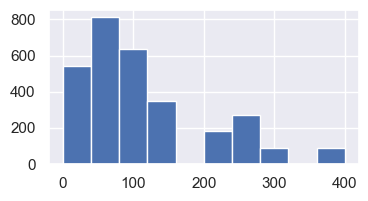

In [119]:
plt.figure(figsize=(4,2) )
np.power(data.Dosage_mg,0.2).hist()

plt.figure(figsize=(4,2) )
data.Dosage_mg.hist()

<AxesSubplot: >

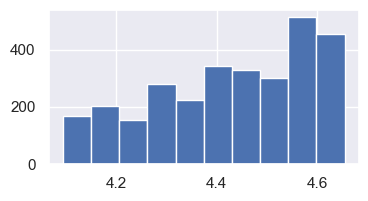

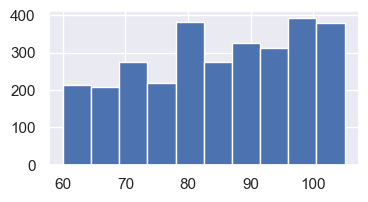

In [120]:
from scipy.stats import boxcox
plt.figure(figsize=(4,2) )
boxcox(data.Heart_rate,0 ).hist()

plt.figure(figsize=(4,2) )
data.Heart_rate.hist()

In [121]:
# data.Heart_rate.value_counts()

In [122]:
if 'Sleep_Quality' in numerical:
    numerical.remove('Sleep_Quality')
if 'Sleep_Quality' not in categorical:
    categorical.append('Sleep_Quality')
numerical,categorical

(['Age',
  'Weight_in_Kgs',
  'Heart_rate',
  'pulse_rate',
  'Systolic_BP',
  'Diastolic_BP',
  'BIS_Value',
  'SPO2',
  'Dosage_mg'],
 ['Gender', 'Pain_Position', 'Medication', 'Label', 'Sleep_Quality'])

In [123]:
data.Pain_Position.value_counts(dropna=False)

Abdomine        544
Fybromialgia    544
Muscle          272
Knee Joint      272
Joint pain      272
No Pain         272
Neck            270
Shoulder        270
Lower Back      254
Shoulder          2
Name: Pain_Position, dtype: int64

### Correlation Matrix

/var/folders/9t/gg5x9qks6sx9c28d9gz2vnnr0000gn/T/ipykernel_42223/3941443963.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


Text(0.5, 1.05, 'Pearson correlation of Features')

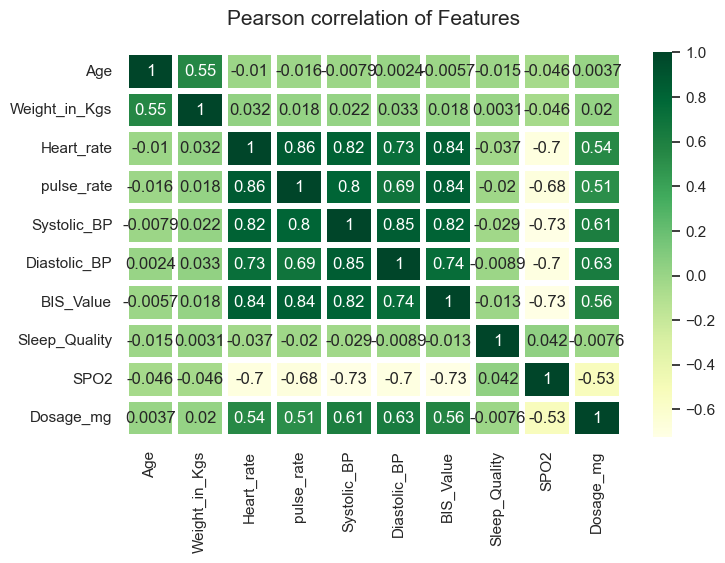

In [124]:
# Pearson correlation table to find the relationship with output of all input features. 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
corr = data.corr()
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')
plt.title("Pearson correlation of Features", y=1.05, size=15)

L2    1387
L3     866
L1     447
L0     272
Name: Label, dtype: int64


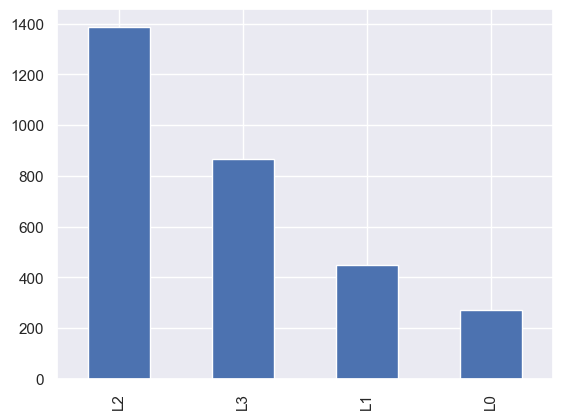

In [125]:
data.Label.value_counts(dropna=False).plot(kind='bar')
print(data.Label.value_counts(dropna=False))

In [126]:
data.Label.value_counts(dropna=False)

L2    1387
L3     866
L1     447
L0     272
Name: Label, dtype: int64

In [127]:
# conda install sklearn-learn

In [128]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
scaler = MinMaxScaler(feature_range=(0,1))
encoder = LabelEncoder()

In [129]:
data.head()

,Age,Weight_in_Kgs,Gender,Heart_rate,pulse_rate,Systolic_BP,Diastolic_BP,BIS_Value,Sleep_Quality,SPO2,Pain_Position,Medication,Dosage_mg,Label
0,49,75.3,Male,85.7,84,141,92,80,0,90,Lower Back,Ibuprofen,150,L3
1,46,61.2,Female,80.2,75,122,81,52,1,94,Shoulder,Tylenol,100,L2
2,19,51.0,Female,83.1,79,128,85,64,1,92,Abdomine,oxycodone,120,L2
3,44,84.0,Male,85.0,81,130,90,74,0,91,Muscle,Morphine,100,L3
4,41,65.0,Female,81.1,75,124,86,66,0,95,Neck,Hydromorphone,90,L2


In [130]:
data.Medication.value_counts(dropna=False)

Duloxetone        274
Aspirin           274
Tylenol           272
oxycodone         272
Morphine          272
Diclophinac       272
Fentanyl Patch    272
X                 272
Hydromorphone     270
Tramadol          270
Ibuprofen         252
Name: Medication, dtype: int64

<AxesSubplot: xlabel='Medication', ylabel='count'>

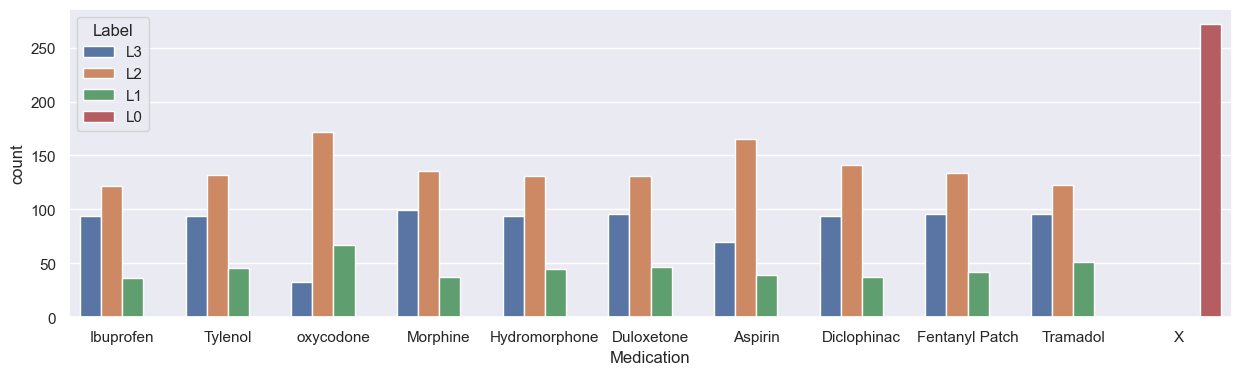

In [131]:
plt.figure(figsize=(15,4))
temp = data.copy()
# temp['Medication'] = temp.Medication.replace('-',np.nan).fillna('X')
temp['Label'] = temp.Label.fillna('X')
sns.countplot(x='Medication',hue='Label',data=temp)


<AxesSubplot: >

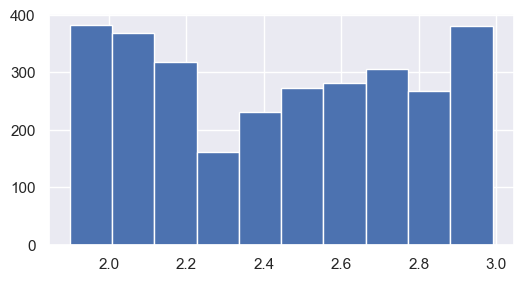

In [132]:
plt.figure(figsize=(6,3))
data['Age_1'] = np.power(data.Age,0.25)
data.Age_1.hist()

<AxesSubplot: >

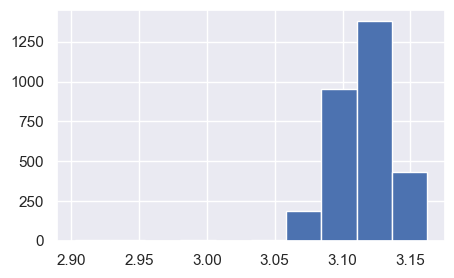

In [133]:
plt.figure(figsize=(5,3))
data['SPO2_1'] = np.power(data.SPO2,0.25)
data.SPO2_1.hist()

<AxesSubplot: >

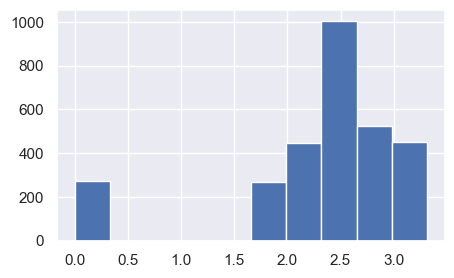

In [134]:
plt.figure(figsize=(5,3))
data['Dosage_mg_1'] = np.power(data.Dosage_mg,0.2)
data.Dosage_mg_1.hist()

In [135]:
sparse_features = ['Gender','Sleep_Quality','Pain_Position','Medication','Label']
dense_features = [x for x in data.columns if x not in sparse_features]
sparse_features, dense_features

(['Gender', 'Sleep_Quality', 'Pain_Position', 'Medication', 'Label'],
 ['Age',
  'Weight_in_Kgs',
  'Heart_rate',
  'pulse_rate',
  'Systolic_BP',
  'Diastolic_BP',
  'BIS_Value',
  'SPO2',
  'Dosage_mg',
  'Age_1',
  'SPO2_1',
  'Dosage_mg_1'])

In [136]:
data.dtypes

Age                int64
Weight_in_Kgs    float64
Gender            object
Heart_rate       float64
pulse_rate         int64
Systolic_BP        int64
Diastolic_BP       int64
BIS_Value          int64
Sleep_Quality      int64
SPO2               int64
Pain_Position     object
Medication        object
Dosage_mg          int64
Label             object
Age_1            float64
SPO2_1           float64
Dosage_mg_1      float64
dtype: object

### Normalize Values

In [137]:
train = data.copy()
for sparse in sparse_features:
    train[sparse] = encoder.fit_transform(train[sparse])
train[dense_features] = scaler.fit_transform(train[dense_features])
train.shape, data.shape

((2972, 17), (2972, 17))

In [138]:
train.head()

,Age,Weight_in_Kgs,Gender,Heart_rate,pulse_rate,Systolic_BP,Diastolic_BP,BIS_Value,Sleep_Quality,SPO2,Pain_Position,Medication,Dosage_mg,Label,Age_1,SPO2_1,Dosage_mg_1
0,0.537313,0.802273,1,0.571111,0.600,0.962963,0.956522,0.714286,0,0.655172,4,5,0.375,3,0.684077,0.683202,0.821876
1,0.492537,0.481818,0,0.448889,0.375,0.259259,0.478261,0.314286,1,0.793103,9,8,0.250,2,0.646105,0.812943,0.757858
2,0.089552,0.250000,0,0.513333,0.475,0.481481,0.652174,0.485714,1,0.724138,0,10,0.300,2,0.173069,0.748601,0.786003
3,0.462687,1.000000,1,0.555556,0.525,0.555556,0.869565,0.628571,0,0.689655,5,6,0.250,3,0.619745,0.716036,0.757858
4,0.417910,0.568182,0,0.468889,0.375,0.333333,0.695652,0.514286,0,0.827586,6,4,0.225,2,0.578468,0.844729,0.742056


In [139]:
train.Label.value_counts(dropna=False)

2    1387
3     866
1     447
0     272
Name: Label, dtype: int64

In [142]:
# train['Medication'] = train.Medication.astype(int)

/var/folders/9t/gg5x9qks6sx9c28d9gz2vnnr0000gn/T/ipykernel_42223/13477398.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


Text(0.5, 1.05, 'Pearson correlation of Features')

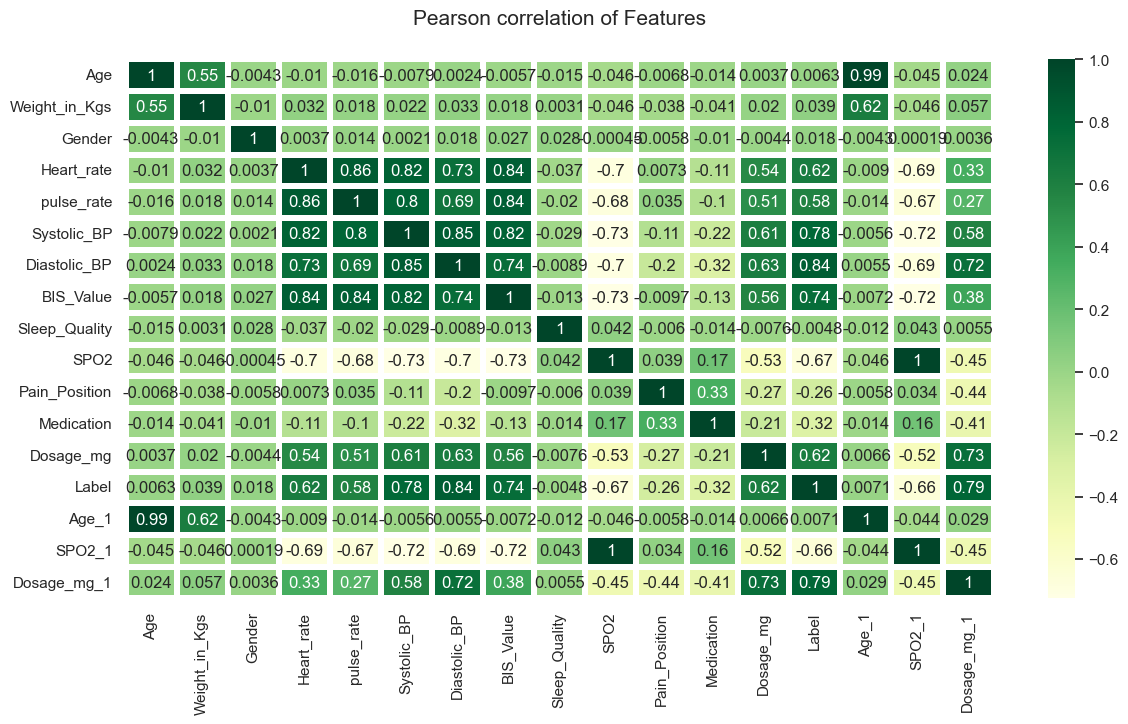

In [144]:
# Pearson correlation table to find the relationship with output of all input features. 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
corr = train.corr()
f, ax = plt.subplots(figsize=(14,7))
sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')
plt.title("Pearson correlation of Features", y=1.05, size=15)

<AxesSubplot: xlabel='Medication', ylabel='count'>

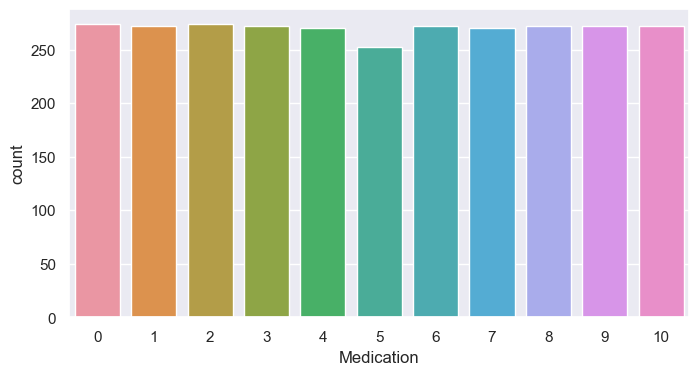

In [55]:
plt.figure(figsize=(8,4))
sns.countplot(x='Medication',data=train)

In [56]:
train.Medication.value_counts(dropna=False)

2     274
0     274
8     272
10    272
6     272
1     272
3     272
9     272
4     270
7     270
5     252
Name: Medication, dtype: int64

In [57]:
# train.Label.astype(int).hist()

In [58]:
train.shape

(2972, 18)

In [145]:
sampled_data = train.copy() #sample(frac=0.1, random_state=42)
sampled_data = sampled_data.dropna(axis=0)
sampled_data.reset_index(inplace=True)
exclude_train = ['y','Age','Label','Dosage_mg','Dosage_mg_1','index','Gender','Sleep_Quality','Medication','SPO2_1']
X = sampled_data.drop(exclude_train, axis=1)
y = sampled_data['Dosage_mg_1']
y1 = sampled_data['Medication']
del sampled_data

In [146]:
X[X.notna()].shape, X.shape

((2970, 9), (2970, 9))

In [147]:
np.where(pd.isnull(X))

(array([], dtype=int64), array([], dtype=int64))

In [148]:
X.head()

,Weight_in_Kgs,Heart_rate,pulse_rate,Systolic_BP,Diastolic_BP,BIS_Value,SPO2,Pain_Position,Age_1
0,0.802273,0.571111,0.600,0.962963,0.956522,0.714286,0.655172,4,0.684077
1,0.481818,0.448889,0.375,0.259259,0.478261,0.314286,0.793103,9,0.646105
2,0.250000,0.513333,0.475,0.481481,0.652174,0.485714,0.724138,0,0.173069
3,1.000000,0.555556,0.525,0.555556,0.869565,0.628571,0.689655,5,0.619745
4,0.568182,0.468889,0.375,0.333333,0.695652,0.514286,0.827586,6,0.578468


array([[<AxesSubplot: title={'center': 'Weight_in_Kgs'}>,
        <AxesSubplot: title={'center': 'Heart_rate'}>,
        <AxesSubplot: title={'center': 'pulse_rate'}>],
       [<AxesSubplot: title={'center': 'Systolic_BP'}>,
        <AxesSubplot: title={'center': 'Diastolic_BP'}>,
        <AxesSubplot: title={'center': 'BIS_Value'}>],
       [<AxesSubplot: title={'center': 'SPO2'}>,
        <AxesSubplot: title={'center': 'Pain_Position'}>,
        <AxesSubplot: title={'center': 'Age_1'}>]], dtype=object)

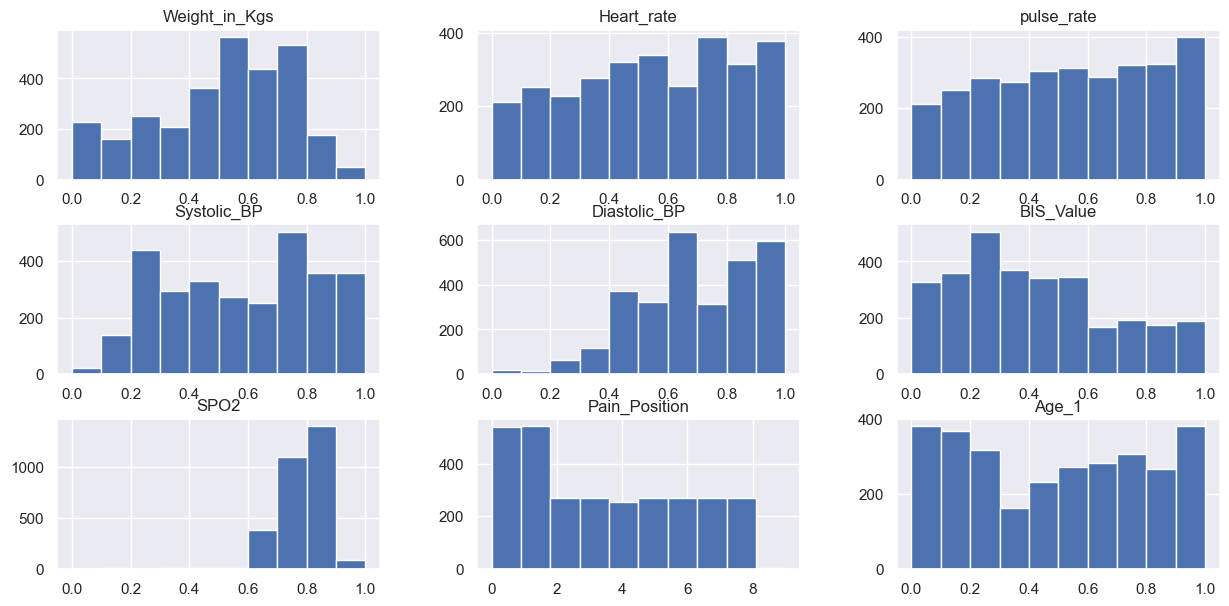

In [149]:
# X.dropna(inplace=True), X.shape
X.hist(figsize=(15,7))

<AxesSubplot: >

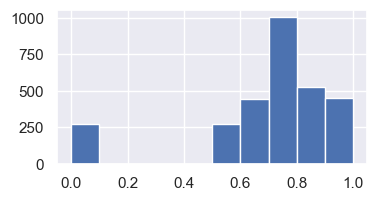

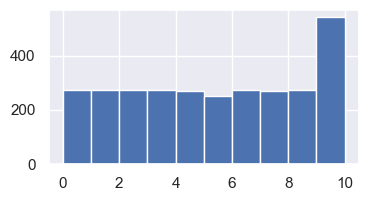

In [150]:
plt.figure(figsize=(4,2) )
y.hist()
plt.figure(figsize=(4,2) )
y1.hist()

In [153]:
import torch
import torch.nn as nn

# embed_features = {}
# X_temp = torch.empty((X.shape[0],1))
# print(X_temp.shape, len(sparse_features) )
# for col in sparse_features:
#     if col in exclude_train:
#         continue
#     emb = nn.Embedding( len(X[col].unique()),1 )
#     embed_features[col] = emb
#     #print(emb(torch.tensor(X[col], dtype=torch.int32)).shape, X_temp.shape )
#     X_temp = torch.cat( (X_temp, embed_features[col](torch.tensor(X[col], dtype=torch.int32) ) ), dim=1)
#     print('Sparse',col,' ',emb.weight.shape)
# X_temp = X_temp[:,1:]

# for col in dense_features:
#     if col in exclude_train:
#         continue
#     print('Dense',col, ' ',torch.tensor(X[col]).view(-1,1).shape)
#     X_temp = torch.cat( (X_temp, torch.tensor(X[col]).view(-1,1) ), dim = 1 )
# print(X_temp.shape)
# del X_temp

/Users/sajin/miniforge3/envs/torch-gpu/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [154]:
if 'X_temp' not in dir():
    X_torch = torch.tensor(X.values).clone()
else:
    X_torch = X_temp.clone()
    print('Loading embeddings....')
    del X_temp
y_torch = torch.tensor(y.values)
y1_torch = torch.tensor(y1.values)
X_torch.shape, y_torch.shape, y1_torch.shape

(torch.Size([2970, 9]), torch.Size([2970]), torch.Size([2970]))

In [155]:
y_torch.unique(), y_torch.shape, y1_torch.unique(), y1_torch.shape

(tensor([0.0000, 0.5957, 0.6598, 0.7155, 0.7421, 0.7579, 0.7860, 0.8219, 0.8706,
         0.9103, 0.9441, 1.0000], dtype=torch.float64),
 torch.Size([2970]),
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 torch.Size([2970]))

In [164]:
# hyperparameters
batch_size = 16 # how many independent feature vectors will we process in parallel?
max_iters = 10000
eval_interval = 200
learning_rate = 1e-5
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = int(X_torch.shape[0]/batch_size)
dropout = 0.0
n_heads = 4

out_h = len(y_torch.unique())
out1_h = len(y1_torch.unique())
print(out1_h,' classes ')

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class TransformerModel(nn.Module):
    def __init__(self, visual_embedding_dim, v_hidden_dim, tabular_feature_dim, num_heads, hidden_dim, num_layers):
        super(TransformerModel, self).__init__()

        # Visual embedding encoder
        self.visual_encoder = nn.Linear(visual_embedding_dim, v_hidden_dim)

        # Tabular data encoder
        self.tabular_encoder = nn.Sequential(
            nn.Linear(tabular_feature_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim)
        )

        # Transformer encoder
        input_hidden_dim = hidden_dim + v_hidden_dim
        self.transformer_encoder_layer = nn.TransformerEncoderLayer(input_hidden_dim, num_heads, dim_feedforward=4*hidden_dim)
        self.transformer_encoder = nn.TransformerEncoder(self.transformer_encoder_layer, num_layers)

        # Output layer
        self.output_layer = nn.Linear(input_hidden_dim, 1) # Regressor Head
        
        # Classification Head
#         self.output_layer1 = nn.Sequential(
#             nn.Linear(input_hidden_dim, 64),
#             nn.ReLU(),
#             nn.Linear(64, out1_h)
#         )
        self.output_layer1 = nn.Linear(input_hidden_dim, out1_h)

    def forward(self, visual_input, tabular_input, targets=None, targets_y1 = None):
        # Visual embedding encoding
        if visual_input != []:
            visual_embedding = self.visual_encoder(visual_input)
        else:
            visual_embedding = []
        # Tabular data encoding
        #print(tabular_input)
        tabular_embedding = self.tabular_encoder(tabular_input)

        # Concatenate visual and tabular embeddings
        #print('before concat =>',visual_embedding.shape, visual_embedding.dtype,tabular_embedding.shape)
        if visual_embedding != []:
            combined_embedding = torch.cat((visual_embedding, tabular_embedding), dim=1)
        else:
            combined_embedding = tabular_embedding

        # Transformer encoding
        #print('After Concatenation ',combined_embedding.shape)
        transformer_output = self.transformer_encoder(combined_embedding)

        # Regressor Head layer
        output = self.output_layer(transformer_output)
        o_y = output
        
        # Classification Layer
        output_y1 = self.output_layer1(transformer_output)
        output_y1 = torch.softmax(output_y1,dim=1)
        o_y1 = torch.argmax(output_y1, dim = 1)
        
        if (targets is None) or (targets_y1 is None):
            print('Inference Mode')
            loss, loss_y, loss_y1 = None, None, None
        else:
            #targets = targets.view(-1,1)
            #print(' Final layer ',output.shape, 'output ',o_y)
            loss_fn = nn.SmoothL1Loss()  # mean square error
            #print(output.shape,targets.view(-1,1).shape)
            loss_y = loss_fn(output, targets.view(-1,1))
            #print(output_y1, targets_y1)
            
            #Classification
            loss_y1 = nn.CrossEntropyLoss()(output_y1, targets_y1)
            weight_dosage = 0.4
            loss = weight_dosage * loss_y + (1- weight_dosage) * loss_y1
        return loss,loss_y,loss_y1, o_y, o_y1
    def predict(X):
        visual_input = []
        _, output = self( visual_input, X )
        print(output)

# Model

#print(model)

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    ix = torch.randint(X_torch.shape[0], (batch_size,)) # generate 32 random indexes of feature set
    #print(ix)
    x = torch.stack( [X_torch[i].float() for i in ix] )
    target = torch.stack([y_torch[i].float() for i in ix])
    target_y1 = torch.stack([y1_torch[i] for i in ix])
    #target = target.view(-1,1)
    #print('Function : ',x.shape, target.shape)
    x, target, target_y1 = x.to(device), target.to(device), target_y1.to(device)
    return x, target, target_y1

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        losses_dosage_y = torch.zeros(eval_iters)
        losses_medicine_class = torch.zeros(eval_iters)
        acc = torch.zeros(eval_iters)
        medicine_class_acc = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y, Y1 = get_batch(split)
            total_loss,dosage_regr_loss, medicine_class_loss,op, op_y1 = model([], X, Y, Y1)
            #print(op_y1, Y1)
            medicine_class_acc[k] = ((torch.sum( op_y1 == Y1 )/ len(Y1) ) *100).item()
            losses[k] = total_loss.item()
            losses_dosage_y[k] = dosage_regr_loss.item()
            losses_medicine_class[k] = medicine_class_loss.item()
        out[split] = losses.mean()
        out['loss_dosage'] = losses_dosage_y.mean()
        out['loss_medication'] = losses_medicine_class.mean()
        out['medicine_class_acc'] = medicine_class_acc.mean()
        
    model.train()
    return out

model = TransformerModel(visual_embedding_dim=0, v_hidden_dim=0, tabular_feature_dim=X_torch.shape[1], 
                         num_heads=n_heads, hidden_dim=32, num_layers=2)
m = model.to(device)
#model = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
visual_input = []
r = visual_input
for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}\
,loss dosage {losses['loss_dosage']:.4f},loss Medication {losses['loss_medication']:.4f}\
, Acc Medication:{losses['medicine_class_acc']:.2f}" )

    # sample a batch of data
    xb, yb, yb1 = get_batch('train')
    #print(xb,yb)
    # evaluate the loss
    loss,_,_,_,_ = model( [],xb, yb, yb1)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()


11  classes 
0.039884 M parameters
step 0: train loss 1.4452, val loss 1.4461,loss dosage 0.0378,loss Medication 2.3850, Acc Medication:21.63
step 200: train loss 1.4094, val loss 1.4079,loss dosage 0.0191,loss Medication 2.3338, Acc Medication:19.04
step 400: train loss 1.3877, val loss 1.3819,loss dosage 0.0180,loss Medication 2.2912, Acc Medication:28.61
step 600: train loss 1.3632, val loss 1.3548,loss dosage 0.0177,loss Medication 2.2462, Acc Medication:29.92
step 800: train loss 1.3338, val loss 1.3362,loss dosage 0.0153,loss Medication 2.2168, Acc Medication:34.84
step 1000: train loss 1.2997, val loss 1.3080,loss dosage 0.0136,loss Medication 2.1709, Acc Medication:51.04
step 1200: train loss 1.2710, val loss 1.2690,loss dosage 0.0126,loss Medication 2.1067, Acc Medication:62.03
step 1400: train loss 1.2412, val loss 1.2425,loss dosage 0.0127,loss Medication 2.0624, Acc Medication:62.67
step 1600: train loss 1.2198, val loss 1.2147,loss dosage 0.0117,loss Medication 2.0168, Acc

In [225]:
# hyperparameters
batch_size = 16 # how many independent feature vectors will we process in parallel?
max_iters = 10000
eval_interval = 200
learning_rate = 1e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = int(X_torch.shape[0]/batch_size)
dropout = 0.0
n_heads = 4

out_h = len(y_torch.unique())
out1_h = len(y1_torch.unique())
print(out1_h,' classes ')

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class TransformerModel(nn.Module):
    def __init__(self, visual_embedding_dim, v_hidden_dim, tabular_feature_dim, num_heads, hidden_dim, num_layers):
        super(TransformerModel, self).__init__()

        # Visual embedding encoder
        self.visual_encoder = nn.Linear(visual_embedding_dim, v_hidden_dim)

        # Tabular data encoder
        self.tabular_encoder = nn.Sequential(
            nn.Linear(tabular_feature_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim)
        )

        # Transformer encoder
        input_hidden_dim = hidden_dim + v_hidden_dim
        self.transformer_encoder_layer = nn.TransformerEncoderLayer(input_hidden_dim, num_heads, dim_feedforward=4*hidden_dim)
        self.transformer_encoder = nn.TransformerEncoder(self.transformer_encoder_layer, num_layers)

        # Output layer
        self.output_layer = nn.Linear(input_hidden_dim, 1) # Regressor Head
        
        # Classification Head
#         self.output_layer1 = nn.Sequential(
#             nn.Linear(input_hidden_dim, 64),
#             nn.ReLU(),
#             nn.Linear(64, out1_h)
#         )
        self.output_layer1 = nn.Linear(input_hidden_dim, out1_h)

    def forward(self, visual_input, tabular_input, targets=None, targets_y1 = None):
        # Visual embedding encoding
        if visual_input != []:
            visual_embedding = self.visual_encoder(visual_input)
        else:
            visual_embedding = []
        # Tabular data encoding
        #print(tabular_input)
        tabular_embedding = self.tabular_encoder(tabular_input)

        # Concatenate visual and tabular embeddings
        #print('before concat =>',visual_embedding.shape, visual_embedding.dtype,tabular_embedding.shape)
        if visual_embedding != []:
            combined_embedding = torch.cat((visual_embedding, tabular_embedding), dim=1)
        else:
            combined_embedding = tabular_embedding

        # Transformer encoding
        #print('After Concatenation ',combined_embedding.shape)
        transformer_output = self.transformer_encoder(combined_embedding)

        # Regressor Head layer
        output = self.output_layer(transformer_output)
        o_y = output
        
        # Classification Layer
        output_y1 = self.output_layer1(transformer_output)
        output_y1 = torch.softmax(output_y1,dim=1)
        o_y1 = torch.argmax(output_y1, dim = 1)
        
        if (targets is None) or (targets_y1 is None):
            print('Inference Mode')
            loss, loss_y, loss_y1 = None, None, None
        else:
            #targets = targets.view(-1,1)
            #print(' Final layer ',output.shape, 'output ',o_y)
            loss_fn = nn.SmoothL1Loss()  # mean square error
            #print(output.shape,targets.view(-1,1).shape)
            loss_y = loss_fn(output, targets.view(-1,1))
            #print(output_y1, targets_y1)
            
            #Classification
            loss_y1 = nn.CrossEntropyLoss()(output_y1, targets_y1)
            weight_dosage = 0.4
            loss = weight_dosage * loss_y + (1- weight_dosage) * loss_y1
        return loss,loss_y,loss_y1, o_y, o_y1
    def predict(X):
        visual_input = []
        _, output = self( visual_input, X )
        print(output)

# Model

#print(model)

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    ix = torch.randint(X_torch.shape[0], (batch_size,)) # generate 32 random indexes of feature set
    #print(ix)
    x = torch.stack( [X_torch[i].float() for i in ix] )
    target = torch.stack([y_torch[i].float() for i in ix])
    target_y1 = torch.stack([y1_torch[i] for i in ix])
    #target = target.view(-1,1)
    #print('Function : ',x.shape, target.shape)
    x, target, target_y1 = x.to(device), target.to(device), target_y1.to(device)
    return x, target, target_y1

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        losses_dosage_y = torch.zeros(eval_iters)
        losses_medicine_class = torch.zeros(eval_iters)
        acc = torch.zeros(eval_iters)
        medicine_class_acc = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y, Y1 = get_batch(split)
            total_loss,dosage_regr_loss, medicine_class_loss,op, op_y1 = model([], X, Y, Y1)
            #print(op_y1, Y1)
            medicine_class_acc[k] = ((torch.sum( op_y1 == Y1 )/ len(Y1) ) *100).item()
            losses[k] = total_loss.item()
            losses_dosage_y[k] = dosage_regr_loss.item()
            losses_medicine_class[k] = medicine_class_loss.item()
        out[split] = losses.mean()
        out['loss_dosage'] = losses_dosage_y.mean()
        out['loss_medication'] = losses_medicine_class.mean()
        out['medicine_class_acc'] = medicine_class_acc.mean()
        
    model.train()
    return out

model = TransformerModel(visual_embedding_dim=0, v_hidden_dim=0, tabular_feature_dim=X_torch.shape[1], 
                         num_heads=n_heads, hidden_dim=32, num_layers=2)
m = model.to(device)
#model = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
visual_input = []
r = visual_input
for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}\
,loss dosage {losses['loss_dosage']:.4f},loss Medication {losses['loss_medication']:.4f}\
, Acc Medication:{losses['medicine_class_acc']:.2f}" )

    # sample a batch of data
    xb, yb, yb1 = get_batch('train')
    #print(xb,yb)
    # evaluate the loss
    loss,_,_,_,_ = model( [],xb, yb, yb1)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()


11  classes 
0.039884 M parameters


/Users/sajin/miniforge3/envs/torch-gpu/lib/python3.8/site-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


step 0: train loss 1.8501, val loss 1.8495,loss dosage 1.0196,loss Medication 2.4028, Acc Medication:8.95
step 200: train loss 1.4400, val loss 1.4397,loss dosage 0.0215,loss Medication 2.3852, Acc Medication:18.34
step 400: train loss 1.4087, val loss 1.4106,loss dosage 0.0209,loss Medication 2.3370, Acc Medication:17.23
step 600: train loss 1.3711, val loss 1.3756,loss dosage 0.0182,loss Medication 2.2806, Acc Medication:34.59
step 800: train loss 1.3256, val loss 1.3252,loss dosage 0.0164,loss Medication 2.1978, Acc Medication:38.28
step 1000: train loss 1.3045, val loss 1.3084,loss dosage 0.0156,loss Medication 2.1703, Acc Medication:37.36
step 1200: train loss 1.2987, val loss 1.3056,loss dosage 0.0141,loss Medication 2.1666, Acc Medication:43.45
step 1400: train loss 1.2907, val loss 1.2949,loss dosage 0.0140,loss Medication 2.1488, Acc Medication:44.49
step 1600: train loss 1.2816, val loss 1.2728,loss dosage 0.0166,loss Medication 2.1102, Acc Medication:52.67
step 1800: train l

In [230]:
path = os.getcwd()
model_1_path = path + '/med_dos_1'
torch.save(model.state_dict(), model_1_path)

In [231]:
model = TransformerModel(visual_embedding_dim=0, v_hidden_dim=0, tabular_feature_dim=X_torch.shape[1], 
                         num_heads=n_heads, hidden_dim=32, num_layers=2)
model.load_state_dict(torch.load(model_1_path))
model.eval()

/Users/sajin/miniforge3/envs/torch-gpu/lib/python3.8/site-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


TransformerModel(
  (visual_encoder): Linear(in_features=0, out_features=0, bias=True)
  (tabular_encoder): Sequential(
    (0): Linear(in_features=9, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
  )
  (transformer_encoder_layer): TransformerEncoderLayer(
    (self_attn): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=32, out_features=32, bias=True)
    )
    (linear1): Linear(in_features=32, out_features=128, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (linear2): Linear(in_features=128, out_features=32, bias=True)
    (norm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
    (norm2): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
    (dropout1): Dropout(p=0.1, inplace=False)
    (dropout2): Dropout(p=0.1, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAtte

In [224]:
xb, dosage_y, medicine_class_y = get_batch('train')
_, _, _,pred_dosage, pred_medicine_class = model([], xb)
medicine_encoded = encoder.fit(data.Medication)
dosage_scaler = scaler.fit( data['Dosage_mg'].to_numpy().reshape(-1,1) )

medicine_tuple = zip(medicine_encoded.inverse_transform(pred_medicine_class),medicine_encoded.inverse_transform(medicine_class_y) )
dosage_tuple = zip(dosage_scaler.inverse_transform(pred_dosage.detach().numpy()), 
                   dosage_scaler.inverse_transform(dosage_y.detach().numpy().reshape(-1,1)) )

print('Pred    =>       Actual ')
print('==========================')
for a,b in (medicine_tuple):
    print(a,'      ',b)

print('==========================')
print('Pred    =>       Actual ')
print('==========================')
for a,b in (dosage_tuple):
    print(a,'      ',b)
#pred_dosage, dosage_scaler.inverse_transform(pred_dosage.detach().numpy() )


Inference Mode
Pred    =>       Actual 
Ibuprofen        Ibuprofen
Fentanyl Patch        Fentanyl Patch
X        X
Duloxetone        Duloxetone
Duloxetone        Duloxetone
X        X
Diclophinac        Diclophinac
Aspirin        Aspirin
Aspirin        Aspirin
Duloxetone        Tramadol
Duloxetone        Duloxetone
Tramadol        Tramadol
oxycodone        oxycodone
Ibuprofen        Ibuprofen
Aspirin        Aspirin
oxycodone        oxycodone
Pred    =>       Actual 
[365.3636]        [364.11282]
[249.85234]        [263.90158]
[-36.552246]        [0.]
[303.01233]        [303.1433]
[295.65878]        [303.1433]
[5.7910876]        [0.]
[387.9606]        [364.11282]
[281.6324]        [328.75037]
[261.65036]        [263.90158]
[309.73563]        [303.1433]
[298.02905]        [303.1433]
[368.40875]        [377.635]
[285.35248]        [238.27158]
[406.3096]        [400.]
[282.77408]        [286.19382]
[288.38922]        [303.1433]


In [219]:
# dosage_scaler.inverse_transform(pred_dosage.detach().numpy()),dosage_y

In [89]:
import torch
import torch.nn as nn

# size of input (N x C) is = 3 x 5
input = torch.randn(3, 5, requires_grad=True)
# every element in target should have 0 <= value < C
target = torch.tensor([1, 0, 4])

m = nn.LogSoftmax(dim=1)
nll_loss = nn.NLLLoss()
output = nll_loss(m(input), target)
output.backward()

print('input: ', input.shape, m(input))
print('target: ', target)
print('output: ', output)

input:  torch.Size([3, 5]) tensor([[-2.3863, -2.4541, -2.6134, -0.4161, -2.4168],
        [-1.4283, -2.0612, -1.8804, -1.1128, -1.8850],
        [-2.4482, -3.1675, -2.5457, -0.5262, -1.5986]],
       grad_fn=<LogSoftmaxBackward0>)
target:  tensor([1, 0, 4])
output:  tensor(1.8270, grad_fn=<NllLossBackward0>)


In [90]:
target.dtype

torch.int64